In [6]:
import pandas as pd
import numpy as np
import umap
import umap.plot
import gudhi as gd
import matplotlib.pyplot as plt
#from umap import UMAPTransformer
from scipy.spatial.distance import pdist, squareform
from itertools import combinations
import scipy.cluster.hierarchy as sch
import requests
from Bio import SeqIO
from Bio.Align import MultipleSeqAlignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw

In [7]:
##Calcula la secuencia media a partiar de secuencias
def compute_median_sequence(a, b, c):
    median = ""
    for i in range(len(a)):
        counts = {'0': 0, '1': 0}
        counts[a[i]] += 1
        counts[b[i]] += 1
        counts[c[i]] += 1
        majority = max(counts, key=counts.get)
        median += majority
    return median
##Calcula la secuencia media a partiar de vectores
def compute_median_vector(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    median = np.zeros_like(a)
    for i in range(len(a)):
        counts = np.bincount([a[i], b[i], c[i]])
        majority = np.argmax(counts)
        median[i] = majority
    return median.tolist()
##Crea un nuevo diccionario, a partir del anterior, y le agrega los puntos medios
def process_dict_elements(dictionary):
    keys = list(dictionary.keys())
    result = {}
    for combination in combinations(keys, 3):
        a, b, c = combination
        median = compute_median_vector(dictionary[a], dictionary[b], dictionary[c])
        new_key = f"{a}_{b}_{c}"  # Clave nueva basada en la combinación de claves originales
        result[new_key] = median
    dictionary.update(result)  # Agregar las medianas calculadas al diccionario original
    return dictionary
##calcula la matriz de distancia a partir de un dataframe
def distancia(df,metrica='hamming'):
    distances = pdist(df.values.T, metric=metrica)
    distance_matrix = squareform(distances)
    return(distance_matrix)
##Calcula el comprejo de Rips y regresa la persistencia.
def complejo(distance_matrix):
# Create the simplicial complex from the distance matrix
    rips_complex = gd.RipsComplex(distance_matrix)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
# Compute persistence
    persistence = simplex_tree.persistence()
    return(persistence)

In [2]:
def crear_archivo_txt(diccionario):
    with open('genomas.fa', 'w') as archivo:
        for clave, valores in diccionario.items():
            archivo.write(">" + clave + "\n")  # Escribe la clave con ">" al inicio
            cadena_valores = ''.join(str(valor) for valor in valores)  # Concatena los elementos de la lista
            archivo.write(cadena_valores + "\n")  # Escribe la cadena de valores

In [3]:
def hamming_distance(string1: str, string2: str) -> int:
    """Return the Hamming distance between two strings."""
    if len(string1) != len(string2):
        raise ValueException("Strings must be of equal length.")
    dist_counter = 0
    for n in range(len(string1)):
        if string1[n] != string2[n]:
            dist_counter += 1
    return dist_counter

In [4]:
def plot_cladogram(data):
    # Convert the dictionary into a matrix
    matrix = np.array([list(value) for value in data.values()])

    # Calculate the distance matrix
    dist_matrix = sch.distance.pdist(matrix)

    # Perform hierarchical clustering
    linkage_matrix = sch.linkage(dist_matrix)

    # Plot the dendrogram
    plt.figure(figsize=(8, 6))
    dendrogram = sch.dendrogram(linkage_matrix, labels=list(data.keys()), orientation='right')

    # Adjust the margins and labels of the x-axis
    plt.subplots_adjust(bottom=0.1)
    plt.xticks(rotation='vertical')

    # Show the cladogram
    plt.show()

In [8]:
df = pd.read_csv("/home/shaday/GIT/cambda2023/Resistencia/data/230622_AMR_mysterious_ETBC_all_nelly.csv", index_col=0)
df2=df.iloc[-10:,3:]
df2

,rpos,ARO:3000361,espy1,drad,allr,feob,kphs_23120,gspj,ARO:3002714,ARO:3002796,...,ARO:3003838,ARO:3002132,ARO:3003577,parc,ARO:3001115,gnd,ARO:3002357,ARO:3000833,ompk35,hcp1tssd1
ID,,,,,,,,,,,,,,,,,,,,,
BAL_En,0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0
DEN_En,0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0
MIN_En,0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0
NYC_En,1,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.0,1,1,0.0,1,0.0,1,1,0
NYC_Es,1,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.0,1,0,0.0,1,0.0,1,0,0
NYC_Kl,1,0.0,0,0,0,0,0,0,0.0,0.0,...,1,0.0,1,1,0.0,0,0.0,1,1,0
SAC_En,0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0
DEN_Es,0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0
DEN_Kl,0,0.0,0,0,0,0,0,0,0.0,0.0,...,0,0.0,0,0,0.0,0,0.0,0,0,0


In [9]:
df2=df2.T

In [10]:
genomas_id = {}
for columna in df2.columns:
    genomas_id[columna] = list(np.array(df2[columna]))
genomas_id

{'BAL_En': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0

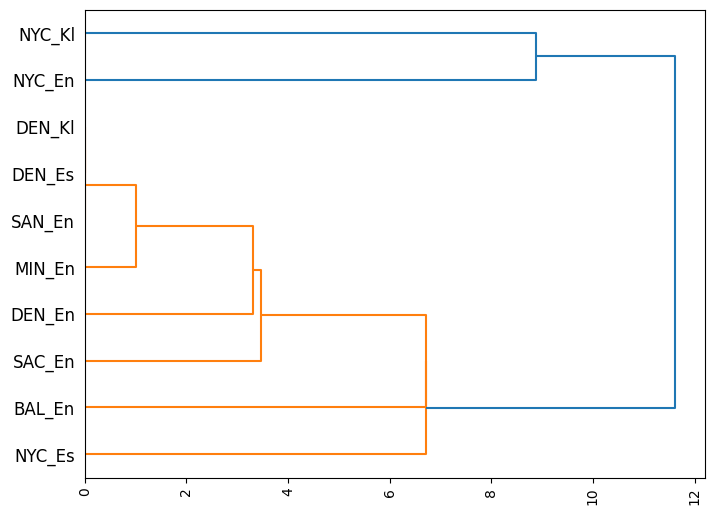

In [11]:
plot_cladogram(genomas_id)

### Mediam Complex


In [12]:
genomas_id_mediam=process_dict_elements(genomas_id)
genomas_id_mediam

{'BAL_En': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0

usetex mode requires dvipng.


<AxesSubplot:title={'center':'Persistence barcode'}>

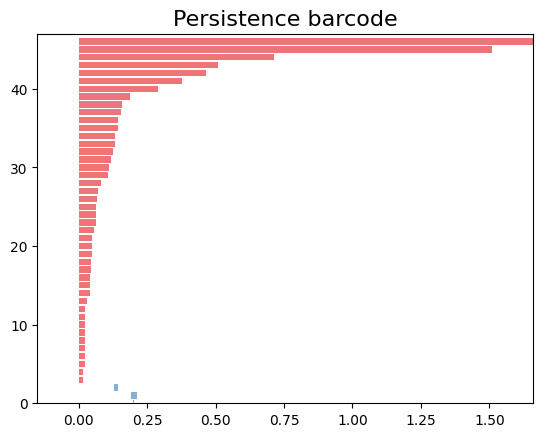

In [13]:
df_mediam = pd.DataFrame.from_dict(genomas_id_mediam)
matrix_dintancia_extendida=distancia(df_mediam)
persistence_extendida=complejo(matrix_dintancia_extendida)
gd.plot_persistence_barcode(persistence_extendida)